In [2]:
import pandas as pd

In [80]:
df = pd.read_csv('flights_merged.csv')

In [81]:
df.isnull().sum()

fl_date                   0
mkt_unique_carrier        0
branded_code_share        0
mkt_carrier               0
mkt_carrier_fl_num        0
op_unique_carrier         0
tail_num                  0
op_carrier_fl_num         0
origin_airport_id         0
origin                    0
origin_city_name          0
dest_airport_id           0
dest                      0
dest_city_name            0
crs_dep_time              0
dep_time                  0
dep_delay                 0
taxi_out                  0
wheels_off                0
wheels_on                 0
taxi_in                   0
crs_arr_time              0
arr_time                  0
arr_delay                 0
cancelled                 0
diverted                  0
dup                       0
crs_elapsed_time          0
actual_elapsed_time       0
air_time                  0
flights                   0
distance                  0
carrier_delay             0
weather_delay             0
nas_delay                 0
security_delay      

In [63]:
df['desc_day'].unique()

array(['Patchy light snow', nan, 'Overcast', 'Cloudy', 'Light rain',
       'Sunny', 'Partly cloudy', 'Moderate snow', 'Patchy light rain',
       'Light drizzle', 'Patchy rain possible', 'Patchy light drizzle',
       'Fog', 'Blizzard', 'Heavy rain', 'Heavy snow', 'Light rain shower',
       'Moderate rain', 'Mist', 'Patchy heavy snow',
       'Moderate or heavy rain shower', 'Thundery outbreaks possible',
       'Patchy light rain with thunder', 'Torrential rain shower',
       'Light snow', 'Heavy rain at times', 'Moderate rain at times',
       'Patchy moderate snow', 'Light sleet', 'Moderate or heavy sleet',
       'Light snow showers', 'Moderate or heavy snow showers',
       'Light freezing rain', 'Moderate or heavy rain with thunder',
       'Patchy snow possible', 'Moderate or heavy freezing rain',
       'Freezing fog'], dtype=object)

In [82]:
df['weather_desc'] = ''

weather_dict = {'Patchy light snow': 'Snow', 'Overcast': 'Cloudy', 'Cloudy':'Cloudy', 'Light rain':'Rain',
       'Sunny':'Sunny', 'Partly cloudy':'Cloudy', 'Moderate snow':'Snow', 'Patchy light rain':'Rain',
       'Light drizzle':'Cloudy', 'Patchy rain possible':'Cloudy', 'Patchy light drizzle':'Cloudy',
       'Fog':'Cloudy', 'Blizzard':'Storm', 'Heavy rain':'Rain', 'Heavy snow':'Snow', 'Light rain shower':'Rain',
       'Moderate rain':'Rain', 'Mist':'Cloudy', 'Patchy heavy snow':'Snow',
       'Moderate or heavy rain shower':'Rain', 'Thundery outbreaks possible':'Storm',
       'Patchy light rain with thunder':'Rain', 'Torrential rain shower':'Rain',
       'Light snow':'Snow', 'Heavy rain at times':'Rain', 'Moderate rain at times':'Rain',
       'Patchy moderate snow':'Snow', 'Light sleet':'Snow', 'Moderate or heavy sleet':'Snow',
       'Light snow showers':'Snow', 'Moderate or heavy snow showers':'Rain',
       'Light freezing rain':'Storm', 'Moderate or heavy rain with thunder':'Rain',
       'Patchy snow possible':'Snow', 'Moderate or heavy freezing rain':'Rain',
       'Freezing fog':'Cloudy'
}

for word in weather_dict.keys():
    df.loc[df['desc_day'].str.contains(word, na=False), 
                   ['weather_desc']] = weather_dict[word]

In [83]:
df['weather_desc'].unique()

array(['Snow', '', 'Cloudy', 'Rain', 'Sunny', 'Storm'], dtype=object)

In [85]:
df.to_csv('df_unfiltered.csv', index=False)

In [87]:
df2 = df.drop(['temp_night_list', 'speed_night', 'desc_night'], axis=1)

In [88]:
df2.isnull().sum()

fl_date                   0
mkt_unique_carrier        0
branded_code_share        0
mkt_carrier               0
mkt_carrier_fl_num        0
op_unique_carrier         0
tail_num                  0
op_carrier_fl_num         0
origin_airport_id         0
origin                    0
origin_city_name          0
dest_airport_id           0
dest                      0
dest_city_name            0
crs_dep_time              0
dep_time                  0
dep_delay                 0
taxi_out                  0
wheels_off                0
wheels_on                 0
taxi_in                   0
crs_arr_time              0
arr_time                  0
arr_delay                 0
cancelled                 0
diverted                  0
dup                       0
crs_elapsed_time          0
actual_elapsed_time       0
air_time                  0
flights                   0
distance                  0
carrier_delay             0
weather_delay             0
nas_delay                 0
security_delay      

In [89]:
df2['temp_day_list'] = df2['temp_day_list'].fillna('none')
df2['speed_day'] = df2['speed_day'].fillna('none')
df2['desc_day'] = df2['desc_day'].fillna('none')

for index, row in df2.iterrows():   # drop rows missing target variable
    if row['temp_day_list'] == 'none':
        df2.drop(index=index, inplace=True)

In [90]:
for index, row in df2.iterrows():   # drop rows missing target variable
    if row['speed_day'] == 'none':
        df2.drop(index=index, inplace=True)

In [91]:
for index, row in df2.iterrows():   # drop rows missing target variable
    if row['desc_day'] == 'none':
        df2.drop(index=index, inplace=True)

In [92]:
df2.isnull().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
dup                    0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
carrier_name           0
delayed                0
temp_day_list          0


In [14]:
import datetime

date_today = datetime.datetime.today()
day_today = datetime.datetime.today().weekday()
day_today

3

In [93]:
df2['fl_date'] = pd.to_datetime(df2['fl_date'])

In [94]:
df2['day_of_week'] = df2['fl_date'].dt.day_name()

In [98]:
df2.to_csv('df_filtered.csv', index=False)

In [75]:
days = df2.groupby('day_of_week').count().sort_values(by='fl_date', 
                            ascending=False)

days.reset_index(inplace=True)

days

,day_of_week,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier_name,delayed,temp_day_list,speed_day,desc_day,weather_desc
0,Sunday,3319,3319,3319,3319,3319,3319,3319,3319,3319,...,3319,3319,3319,3319,3319,3319,3319,3319,3319,3319
1,Tuesday,3168,3168,3168,3168,3168,3168,3168,3168,3168,...,3168,3168,3168,3168,3168,3168,3168,3168,3168,3168
2,Friday,3051,3051,3051,3051,3051,3051,3051,3051,3051,...,3051,3051,3051,3051,3051,3051,3051,3051,3051,3051
3,Monday,2896,2896,2896,2896,2896,2896,2896,2896,2896,...,2896,2896,2896,2896,2896,2896,2896,2896,2896,2896
4,Saturday,2720,2720,2720,2720,2720,2720,2720,2720,2720,...,2720,2720,2720,2720,2720,2720,2720,2720,2720,2720
5,Thursday,2711,2711,2711,2711,2711,2711,2711,2711,2711,...,2711,2711,2711,2711,2711,2711,2711,2711,2711,2711
6,Wednesday,2709,2709,2709,2709,2709,2709,2709,2709,2709,...,2709,2709,2709,2709,2709,2709,2709,2709,2709,2709


<AxesSubplot:xlabel='arr_delay', ylabel='day_of_week'>

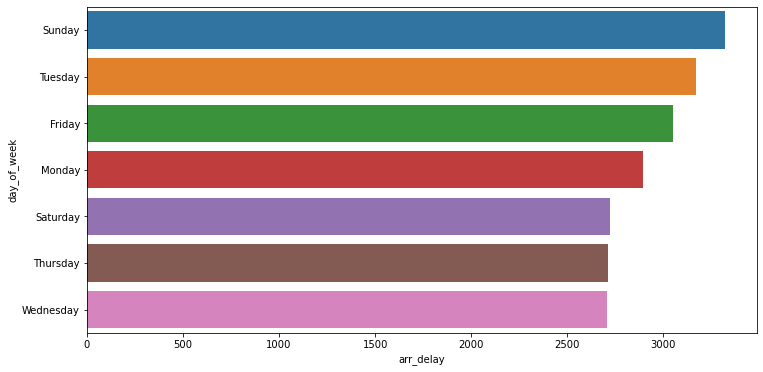

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(x='arr_delay', y = 'day_of_week', data=days)

In [21]:
days_delayed = df2[df2['delayed'] == 1]


days_delayed = days_delayed.groupby('day_of_week').count().sort_values(by='fl_date', 
                            ascending=False)

days_delayed

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier_name,delayed,temp_day_list,speed_day,desc_day,weather_desc
day_of_week,,,,,,,,,,,,,,,,,,,,,
Friday,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,...,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275
Sunday,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108,...,1108,1108,1108,1108,1108,1108,1108,1108,1108,1108
Monday,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101,...,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101
Tuesday,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,...,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087
Thursday,1046,1046,1046,1046,1046,1046,1046,1046,1046,1046,...,1046,1046,1046,1046,1046,1046,1046,1046,1046,1046
Wednesday,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,...,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008
Saturday,874,874,874,874,874,874,874,874,874,874,...,874,874,874,874,874,874,874,874,874,874


<AxesSubplot:xlabel='arr_delay', ylabel='day_of_week'>

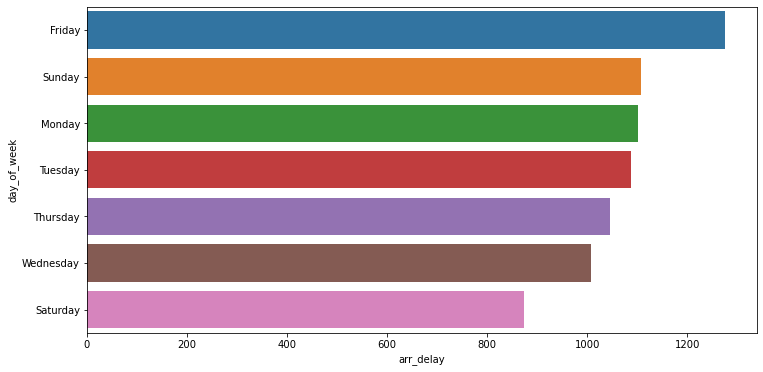

In [22]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(x='arr_delay', y = 'day_of_week', data=days_delayed.reset_index())

In [ ]:
df2.iloc[:,5:25]

In [40]:
df2.iloc[:,5:45]

,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,...,security_delay,late_aircraft_delay,carrier_name,delayed,temp_day_list,speed_day,desc_day,weather_desc,day_of_week,dep_time_hours
0,WN,N733SA,1997,13232,MDW,"Chicago, IL",13198,MCI,"Kansas City, MO",1920,...,0.0,26.0,Southwest Airlines,1,-17,15,Patchy light snow,Snow,Monday,0
1,WN,N8633A,181,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",855,...,0.0,30.0,Southwest Airlines,1,-17,15,Patchy light snow,Snow,Monday,0
2,WN,N8625A,185,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",1250,...,0.0,0.0,Southwest Airlines,1,-17,15,Patchy light snow,Snow,Monday,0
3,WN,N564WN,403,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",1615,...,0.0,0.0,Southwest Airlines,0,-17,15,Patchy light snow,Snow,Monday,0
4,WN,N8305E,1229,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",700,...,0.0,0.0,Southwest Airlines,1,-17,15,Patchy light snow,Snow,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30368,9E,N936XJ,3287,11433,DTW,"Detroit, MI",11193,CVG,"Cincinnati, OH",1605,...,0.0,0.0,Endeavor Air,0,24,14,Partly cloudy,Cloudy,Wednesday,0
30369,9E,N8683B,3288,10397,ATL,"Atlanta, GA",10990,CHO,"Charlottesville, VA",2123,...,0.0,0.0,Endeavor Air,1,32,5,Sunny,Sunny,Wednesday,0
30372,9E,N311PQ,3291,10721,BOS,"Boston, MA",13931,ORF,"Norfolk, VA",605,...,0.0,0.0,Endeavor Air,0,35,12,Sunny,Sunny,Wednesday,0
30374,9E,N297PQ,3292,11298,DFW,"Dallas/Fort Worth, TX",11193,CVG,"Cincinnati, OH",906,...,0.0,0.0,Endeavor Air,0,35,11,Sunny,Sunny,Wednesday,0


In [30]:
t = 419
a = pd.to_datetime(t, format='%H%M')

print(a.hour a.minute)
    

SyntaxError: invalid syntax (<ipython-input-30-71b0d354b209>, line 4)

In [51]:
import numpy as np

df2.iloc[:,40:50]

,speed_day,desc_day,weather_desc,day_of_week,dep_time_hours
0,15,Patchy light snow,Snow,Monday,0
1,15,Patchy light snow,Snow,Monday,0
2,15,Patchy light snow,Snow,Monday,0
3,15,Patchy light snow,Snow,Monday,0
4,15,Patchy light snow,Snow,Monday,0
...,...,...,...,...,...
30368,14,Partly cloudy,Cloudy,Wednesday,0
30369,5,Sunny,Sunny,Wednesday,0
30372,12,Sunny,Sunny,Wednesday,0
30374,11,Sunny,Sunny,Wednesday,0


In [54]:
df2_filtered = df2.loc[:, ['origin_city_name', 'arr_delay', 'carrier_name', 'delayed', 'temp_day_list', 'speed_day', 
                           'weather_desc', 'day_of_week']]

In [78]:
df_new = pd.get_dummies(df2_filtered)
df_new

,arr_delay,delayed,"origin_city_name_Atlanta, GA","origin_city_name_Baltimore, MD","origin_city_name_Boston, MA","origin_city_name_Charlotte, NC","origin_city_name_Chicago, IL","origin_city_name_Dallas, TX","origin_city_name_Dallas/Fort Worth, TX","origin_city_name_Denver, CO",...,weather_desc_Snow,weather_desc_Storm,weather_desc_Sunny,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,36,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,41,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,9,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,-5,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,14,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30368,-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30369,4,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
30372,-11,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
30374,-23,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [56]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()
scaler.fit(df_new)
scaled_df = scaler.transform(df_new)

array([[ 0.63472419,  1.32044152, -0.28742684, ..., -0.38957184,
        -0.42662185, -0.38940632],
       [ 0.7394071 ,  1.32044152, -0.28742684, ..., -0.38957184,
        -0.42662185, -0.38940632],
       [ 0.06943651,  1.32044152, -0.28742684, ..., -0.38957184,
        -0.42662185, -0.38940632],
       ...,
       [-0.34929511, -0.75732244, -0.28742684, ..., -0.38957184,
        -0.42662185,  2.56801176],
       [-0.60053409, -0.75732244, -0.28742684, ..., -0.38957184,
        -0.42662185,  2.56801176],
       [-0.57959751, -0.75732244, -0.28742684, ..., -0.38957184,
        -0.42662185,  2.56801176]])

In [ ]:
df2['dep_time'] = df2['dep_time'].astype(int)
df2['dep_time'] = df2['dep_time'].astype(str)

df2['dep_time'] = pd.to_datetime(df2['dep_time'], format='%h%m')

df2['dep_time_hours'] = df2['dep_time'].dt.hour